## Support Vector Machines

**This part is reproduced from Introduction to Statistical Learning**

![](images/svm.png)

**Fig 9.2**

In general, if our data can be perfectly separated using a hyperplane, then there will in fact exist an infinite number of such hyperplanes. This is because a given separating hyperplane can usually be shifted a tiny bit up or down, or rotated, without coming into contact with any of the observations. Three possible separating hyperplanes are shown in the left-hand panel of Figure 9.2. In order to construct a classifier based upon a separating hyperplane, we must have a reasonable way to decide which of the infinite possible separating hyperplanes to use.

A natural choice is the maximal margin hyperplane (also known as the optimal separating hyperplane), which is the separating hyperplane that is farthest from the training observations. That is, we can compute the (perpendicular) distance from each training observation to a given separating hyperplane; the smallest such distance is the minimal distance from the
observations to the hyperplane, and is known as the margin. The maximal margin hyperplane is the separating hyperplane for which the margin is largest—that is, it is the hyperplane that has the farthest minimum distance to the training observations. We can then classify a test observation based on which side of the maximal margin hyperplane it lies.

![](images/svm1.png)

Examining Figure 9.3, we see that three training observations are equidistant from the maximal margin hyperplane and lie along the dashed lines indicating the width of the margin. These three observations are known as support vectors, since they are vectors in p-dimensional space (in Figure 9.3, support p = 2) and they “support” the maximal margin hyperplane in the sense vector that if these points were moved slightly then the maximal margin hyperplane would move as well. Interestingly, the maximal margin hyperplane depends directly on the support vectors, but not on the other observations: a movement to any of the other observations would not affect the separating hyperplane, provided that the observation’s movement does not cause it to cross the boundary set by the margin.

Suppose there are `n` datapoints and `k` possible hyperplanes. We calculate perpendicular distances for each data points to each hyperplanes. For a given hyprplane `h1`, some data points will be closer to that hyperplane while other will be farther from it. We pick the point which is closest to `h1` and note its distance as $h^1_{min}$. We repeat the same process for all other hyperplanes and note the distance of closest datapoint. We will have a list of minimum distances like [$h^1_{min}$,$h^2_{min}$..$h^i_{min}$...$h^k_{min}$]

We choose the hyperplane with highest value of $h^i_{min}$

##### `svm.SVC`
`class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True,
probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=
False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)`

The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples. The multiclass support is handled according to a one-vs-one scheme. 

`kernel` parameter default is `rbf`. Other options include `poly`, `linear`, `sigmoid`, `precomputed` or a callable.

-----------------------------------------------------------------------------------------------------------------------------
##### `svm.LinearSVC`

`class sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001,
C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1,
class_weight=None, verbose=0, random_state=None, max_iter=1000)`

Similar to SVC with parameter `kernel`=`linear`, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest
scheme.

---------------------------------------------------------------------------------------------------------------------

SVC and NuSVC implement the "one-against-one" approach for multi-class classification. If `n_class` is the number of classes, then `n_classes*(n_classes-1)/2` classifiers are constructed and each one trains data from two classes.

On the other hand, LinearSVC implements "one-vs-rest" multi-class strategy, thus training `n_class` models. If there are only 2 classes, only one model is trained.

<div class="alert alert-block alert-warning">SVMs are sensitive to scales of features. Try to use Scikit-Learn's `StandardScaler` for feature scaling</div>

### A Simple Example

[[-2.8519409  -5.08138413]]


/Users/user/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


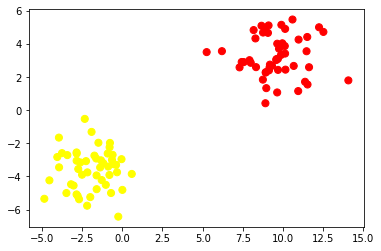

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.40)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
print(X[:1])

In [2]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [3]:
print(model.support_vectors_),print('\n'), #these are the coordinates of points of support vectors
print(model.support_),print('\n'), #indices for support vectors
print(model.coef_),print('\n'), #weights assigned to features(coeffs in the primal problem). only available in linear kernel case.
print(model.n_support_),print('\n'), 
print(X[31]);
print(model.dual_coef_) #Coeffs of support vector in decision function. For multiclass, coeff for all 1-vs-1 classifiers.
print(model.intercept_)

[[ 5.25018538  3.49830845]
 [-0.77276515 -1.97690277]]


[97 52]


[[-0.1818143  -0.16527974]]


[1 1]


[9.6934067  2.42589749]
[[-0.03018692  0.03018692]]
[0.53275828]


In [4]:
model.decision_function(X)  
#Distance of the samples X to the separating hyperplane.
#sign indecates class. In this case '-' indicates class 0 otherwise 1

array([ 1.89113176, -1.88366635, -1.8186122 , -1.71749434,  1.9925666 ,
        1.25589235,  1.85250982,  1.08919298,  1.46359225,  1.91112528,
        1.55487959, -1.32064542,  2.05857679, -1.40941143,  1.6449104 ,
        1.47559431, -2.52317485,  1.14599075, -1.89969612,  1.14915356,
        1.06214343, -2.12004333, -1.52392357, -1.94530915, -1.31620614,
       -2.13974565, -1.75151344, -1.84813112,  1.54899355,  1.45254589,
        1.81936623, -1.63059338,  1.32542376,  1.04731115, -1.1822992 ,
       -1.87367213, -1.29833754, -2.52016751, -1.40472252,  1.83657746,
       -1.70975243, -1.96694328, -2.1657622 ,  1.52503254,  1.30266052,
       -1.81936912,  1.88417515,  1.16827049,  1.27493921, -1.15567389,
        1.7628278 ,  1.09842899,  1.00000001,  1.32767889,  1.60423269,
       -2.11783634, -1.60376416,  1.46487746,  1.48230578,  1.61898234,
       -1.88581149,  1.64047413,  1.47283426, -1.22049035, -1.81259211,
       -2.29683715,  1.61152238,  1.35549094, -1.39282299, -1.36

In [5]:
model.decision_function_shape

'ovr'

**This part is reproduced from Introduction to Statistical Learning**

The mathematical definition of a hyperplane is quite simple. In two dimensions, a hyperplane is defined by the equation

$β0 + β1X1 + β2X2 = 0$ (9.1)

for parameters $β0, β1$, and $β2$. 

When we say that (9.1) “defines” the hyperplane, we mean that any X for which (9.1) holds is a point on the hyperplane. Note that (9.1) is simply the equation of a line, since indeed in two dimensions a hyperplane is a line.

Equation 9.1 can be easily extended to the p-dimensional setting:

$β0 + β1X1 + β2X2 + . . . + βpXp = 0$ (9.2)

defines a p-dimensional hyperplane, again in the sense that if a point X in p-dimensional space (i.e. a vector of length p) satisfies (9.2), then X lies on the hyperplane.

Now, suppose that X does not satisfy (9.2); rather,

$β0 + β1X1 + β2X2 + . . . + βpXp > 0$

Then this tells us that X lies to one side of the hyperplane. On the other hand, if

$β0 + β1X1 + β2X2 + . . . + βpXp < 0$

then X lies on the other side of the hyperplane.


In [6]:
%pprint
# For 2-D datasets, cosider the equation - b0 + b1X1 + b2X2 = k
# X lies on hyperplane if k = 0

b0 = model.intercept_
coef = model.coef_.ravel() #value of b1 and b2 in above equation

k = []
l = []
for i in range(100):
    j = sum(X[i]*coef) + b0 # value of k in above equation
    l.append(j.item())
    if j.item() > 0: 
        k.append(1)
    elif j.item() < 0:
        k.append(0)    
    
k,l    

Pretty printing has been turned OFF


([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1], [1.8911317593477552, -1.8836663517998555, -1.8186122013428265, -1.7174943394248066, 1.9925665996674073, 1.255892345771969, 1.852509824349766, 1.0891929834735472, 1.463592253581477, 1.9111252769705815, 1.5548795854054678, -1.3206454158384047, 2.0585767943143427, -1.4094114312684036, 1.6449104032971413, 1.4755943082421115, -2.523174845884121, 1.1459907528877058, -1.899696118321901, 1.1491535617919195, 1.0621434264501826, -2.1200433324929335, -1.5239235657619672, -1.9453091546909163, -1.3162061358682866, -2.139745649237282, -1.7515134352785713, -1.8481311216513767, 1.548993549551824, 1.4525458901317545, 1.8193662304720368, -1.6305933791984242, 1.325423760772947, 1.0473111477820027, -1.182299

In [7]:
y

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [8]:
list(y) == k

True

In [9]:
import numpy as np
test_x1 = np.array([2.5,10])
test_x2 = np.array([-5,-10])
predict_y1 = model.predict(test_x1[np.newaxis,:]) #convert the test values in 2D first, then use it for prediction
predict_y2 = model.predict(test_x2[np.newaxis,:])
print(test_x1) #test value
print(test_x1[np.newaxis,:]) #test value converted in 2D
print(predict_y1, predict_y2) #predicted value


[ 2.5 10. ]
[[ 2.5 10. ]]
[0] [1]


In [10]:
a = np.array([[2.5,10],[-5,-10]])
a

array([[  2.5,  10. ],
       [ -5. , -10. ]])

In [11]:
b =np.array([0,1])


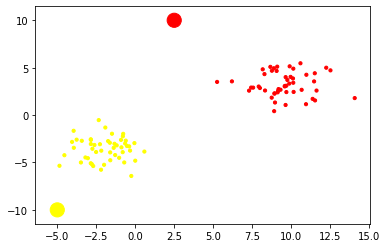

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='autumn');
plt.scatter(a[:, 0], a[:, 1], c=b.ravel(), s=200, cmap='autumn');

#big circles represent test data which have been correctly classified. 

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
rc = roc_curve(y, model.decision_function(X))
ac = roc_auc_score(y, model.decision_function(X))
rc

(array([0., 0., 0., 1.]), array([0.  , 0.02, 1.  , 1.  ]), array([ 3.29988221,  2.29988221,  1.00000001, -2.52317485]))

In [14]:
ac

1.0

In [15]:
fpr, tpr, threshold = rc
threshold

array([ 3.29988221,  2.29988221,  1.00000001, -2.52317485])

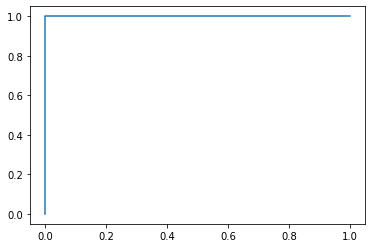

In [16]:
plt.plot(fpr, tpr)

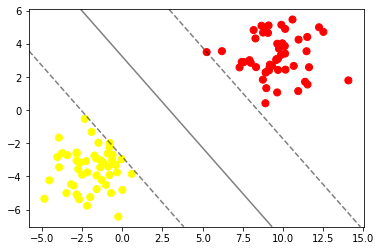

In [17]:
# function to visualize SVM for 2D data. This is really handy function.

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#Using above function to visualize
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);    

#### Softening the Margin

In the example above, there is a very clear separation between 2 groups of data but that might not be the case everywhere. In some cases, data points from each group may overlap. To address this issue, we tune the parameter `c`. In above case, we set the value of `c` as 10,00,00,00,000. The higher the value, the softer the margin (dashed lines are closer to hyperplane). 

From Scikit-Learn doc - 

*Support Vector Machines belong to the discriminant model family: they try to find a combination of samples to build
a plane maximizing the margin between the two classes. Regularization is set by the C parameter: a small value for C
means the margin is calculated using many or all of the observations around the separating line (more regularization);
a large value for C means the margin is calculated on observations close to the separating line (less regularization).*

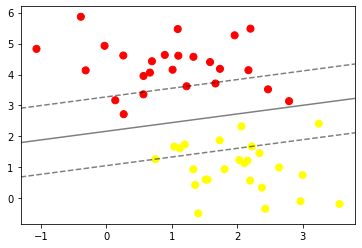

In [18]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=.80)

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=0.1)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);  

It is clear from above example that for `c` = .1, the SVM classifier didn't do the good job. On the other hand if we change the value of `c` to 100, the classification would have been clean.

### SVM for Iris Dataset

For rather detailed working, see section **ROC Curve** in the same notebook 

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

data,target = make_classification(n_classes = 3, n_clusters_per_class = 1)

target = label_binarize(target, classes = [0, 1, 2])
xtrain, xtest, ytrain, ytest = train_test_split(data, target)

model = SVC(probability = True)
multi = OneVsRestClassifier(model)
multi.fit(xtrain, ytrain)
y_pred = multi.predict(xtest)
print(accuracy_score(ytest, y_pred))
y_score = multi.decision_function(xtest)
print(y_score.shape)
print(ytest.shape)

fpr = dict()
tpr = dict()
thres = dict()
roc_auc = dict()


for i in range(3): #3 is number of classes here
    fpr[i], tpr[i], thres[i] = roc_curve(ytest[:,i], y_score[:,i],drop_intermediate = False)
    roc_auc[i] = auc(fpr[i], tpr[i])
        

0.56
(25, 3)
(25, 3)


In [20]:
ytest[:4]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

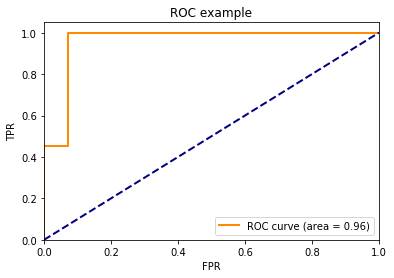

In [21]:
plt.plot(fpr[0], tpr[0], color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0,1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC example')
plt.legend(loc = 'lower right')
plt.show()

In [22]:
fpr[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.14285714, 0.21428571,
       0.28571429, 0.35714286, 0.42857143, 0.5       , 0.57142857,
       0.64285714, 0.71428571, 0.78571429, 0.85714286, 0.92857143,
       1.        ])

In [23]:

tpr[0]

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.45454545, 0.54545455, 0.63636364, 0.72727273,
       0.81818182, 0.90909091, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [24]:
thres[0]

array([ 1.69948767,  0.69948767,  0.58770528,  0.49025059,  0.42254381,
        0.34134478,  0.25140228,  0.23216108, -0.07855548, -0.24667142,
       -0.26354171, -0.44982353, -0.48137614, -0.50022538, -0.52249876,
       -0.54044081, -0.69214233, -0.72510993, -0.753999  , -0.80936685,
       -0.85184933, -0.87806908, -1.0415934 , -1.07095459, -1.1025305 ,
       -1.2052762 ])

In [25]:
y_score #25*3 shape

array([[ 0.42254381, -1.00965954, -0.62892788],
       [ 0.34134478, -1.21477891, -0.34476914],
       [ 0.58770528, -0.90586045, -0.87736503],
       [ 0.69948767, -1.26697812, -0.51282939],
       [-0.80936685,  0.48448825, -0.89854309],
       [-0.48137614, -0.92320273,  0.20932982],
       [-0.24667142, -0.39525145, -0.5168494 ],
       [-0.85184933,  0.93011117, -1.17536758],
       [-0.87806908, -0.5115255 ,  0.21475348],
       [-1.1025305 , -0.74091888,  0.42599445],
       [-1.2052762 ,  1.30642567, -1.30767276],
       [ 0.25140228, -1.15650071, -0.55806026],
       [-0.52249876,  0.17487322, -0.77984081],
       [-0.07855548, -0.9341679 , -0.18408334],
       [-0.69214233, -0.12356114, -0.34440126],
       [-0.50022538, -0.82725234,  0.07566069],
       [-1.0415934 ,  0.4808859 , -0.56317806],
       [-0.26354171, -0.56839588, -0.35212318],
       [-0.44982353, -0.53487142, -0.18326263],
       [-1.07095459, -0.19597633, -0.01462491],
       [-0.72510993, -0.09133332, -0.371

### Example 

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X, y = make_moons(200, noise=.05, random_state=0)
#plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'RdBu');


poly = PolynomialFeatures(3)
x = poly.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(x,y)
model = SVC()
model.fit(xtrain,ytrain);
y_pred = model.predict(xtest)

list(zip(ytest, y_pred))


[(1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0)]

In [27]:
x[1]

array([ 1.        ,  1.61859642, -0.37982927,  2.61985437, -0.6147903 ,
        0.14427028,  4.2404869 , -0.99509738,  0.23351535, -0.05479807])

In [28]:
X[1]

array([ 1.61859642, -0.37982927])

###  SVM with 'rbf' kernel

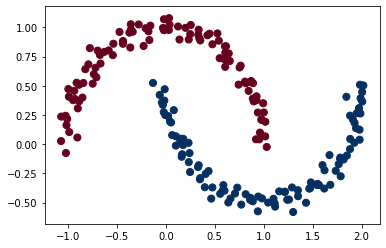

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'RdBu');

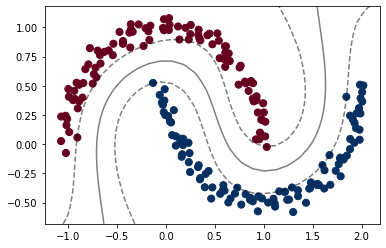

In [30]:
clf = SVC(kernel = 'rbf', C = 1E5)
clf.fit(X,y)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'RdBu');
plot_svc_decision_function(clf);  

In [31]:
clf.intercept_

array([-0.02701658])

In [32]:
clf.decision_function(X)[:3]

array([-1.82572464,  1.68417436,  2.05673045])

In [33]:
clf.n_support_

array([4, 5], dtype=int32)

### Kernel SVM

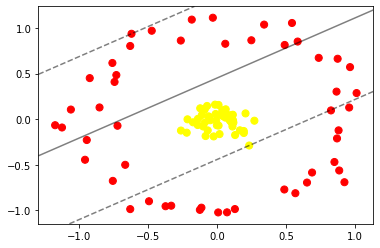

In [34]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

As is obvious in above case, even though data is classifiable, regular SVM doesn't work here.It is clear that no linear discrimination will ever be able to separate this data. But we can draw a lesson from the basis function regressions in In Depth: Linear Regression, and think about how we might project the data into a higher dimension such that a linear separator would be sufficient. For example, one simple projection we could use would be to compute a radial basis function centered on the middle clump:


interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<IPython.core.display.Javascript object>


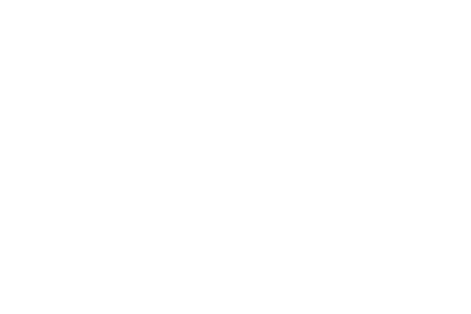

In [35]:
%matplotlib notebook
r = np.exp(-(X ** 2).sum(1))
%matplotlib notebook
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y));

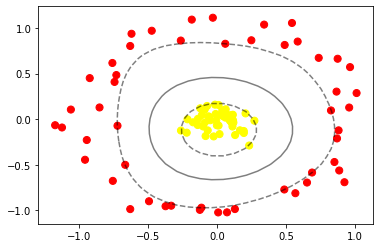

In [36]:
clf = SVC(kernel='rbf', C=1E6) #rbf = radial basis function
clf.fit(X, y)
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

### Face Recognition with SVM

This is a rather elaborate example. This also introduces uses of GridSearch, Pipeline, Classification Report.

In [37]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


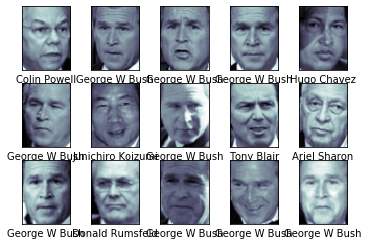

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [39]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(svd_solver='randomized',n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 5s, sys: 2.93 s, total: 1min 7s
Wall time: 39.8 s
{'svc__C': 10, 'svc__gamma': 0.001}


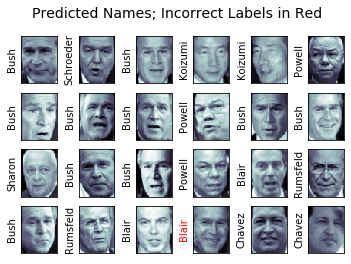

In [41]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



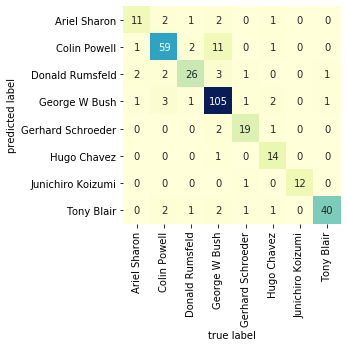

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap = 'YlGnBu',cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### One More Example of Chaining PCA and SVM 

The goal of this example is to show how an unsupervised method and a supervised one can be chained for better prediction.

In [44]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [45]:
faces.data.shape, faces.images.shape, faces.target[:15]

((400, 4096), (400, 64, 64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

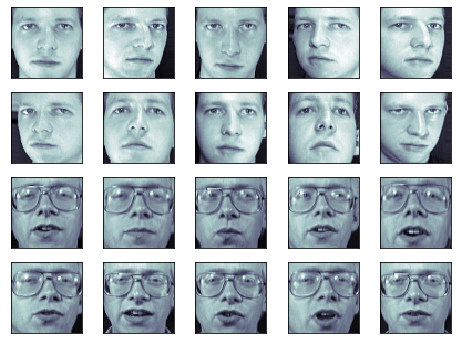

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [47]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(faces.data, faces.target)
xtrain.shape

(300, 4096)

We see that there are 4096 features per sample which is actually a lot for SVM. We already alluded to the fact that SVM doesn't scale well for large datasets. So we'll try to reduce the size of datasets by way of PCA while still retaining most of the information. 

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 150, whiten = True)
pca.fit(xtrain)
pca.mean_, pca.mean_.shape  #what is pca.mean_??

(array([0.40701112, 0.4422865 , 0.4827824 , ..., 0.31428373, 0.3042976 ,
       0.30286494], dtype=float32), (4096,))

One interesting part of PCA is that it computes the “mean” face, which can be interesting to examine:

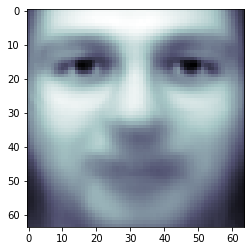

In [49]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [50]:
print(pca.components_.shape)

(150, 4096)


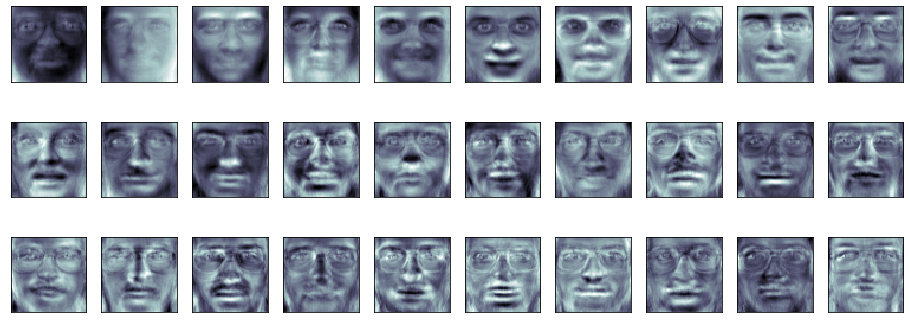

In [51]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [52]:
X_train_pca = pca.transform(xtrain)
X_test_pca = pca.transform(xtest)
print(X_train_pca.shape)

(300, 150)


Now we’ll performsupport-vector-machine classification on this reduced dataset:

In [53]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, ytrain)

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let us see now how our clssificatition did by plotting few test samples. 

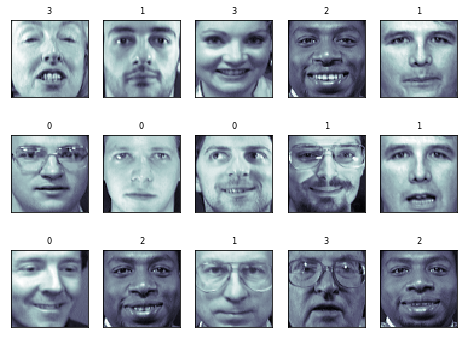

In [54]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(xtest[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == ytest[i] else 'red')
    ax.set_title(faces.target[y_pred],fontsize='small', color=color)

In [55]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       0.80      0.80      0.80         5
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         5
          18       1.00    